In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

datos = pd.read_csv("datos_punto2.csv")


datos

,t(s),x(cm),sigmax(cm)
0,6.5,3.2,1.2
1,9.3,9.7,2.1
2,14.6,11.3,3.6


---
## 2.1

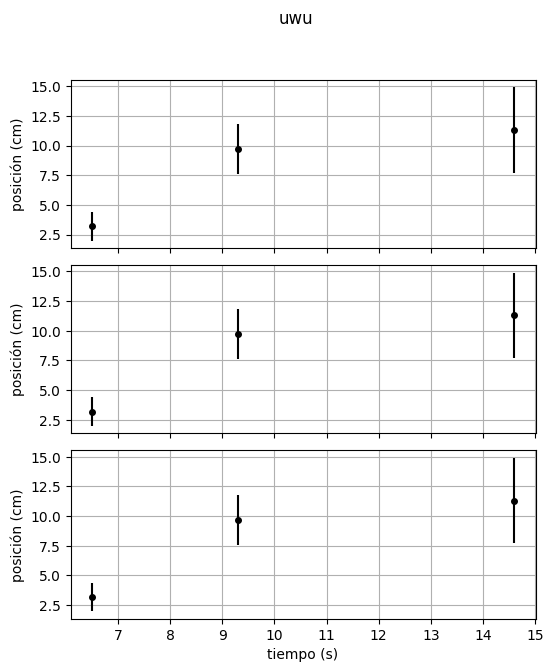

In [31]:
def plot_points(index, xdata, ydata, yerror):
    axis[index].errorbar(xdata,ydata, yerr=yerror, fmt=".", color="black", markersize=8)


def find_mb(x1,x2,y1,y2):
    m = (y2-y1)/(x2-x1)
    b = -m*x1 + y1
    return m, b
    
    
def plot_line(m, b, xmin, xmax):
        XX = np.linspace(xmin, xmax, 2)
        YY = m*XX + b
        


fig = plt.figure(figsize=(6,7))
gs = fig.add_gridspec(3, hspace=0.1) #Sin espacio entre las gráficas
axis = gs.subplots(sharex=True, sharey=True)


fig.suptitle("uwu")
#axis[0].bar(center1, V1_hist, label=f"$\Delta$V=1 V", width=delta1, edgecolor="black")
#axis[1].bar(center2, V2_hist, label=f"$\Delta$V=2 V", width=delta2, edgecolor="black")

for ii in range (len(axis)):
    plot_points(ii, datos["t(s)"], datos["x(cm)"], datos["sigmax(cm)"])
    axis[ii].set(ylabel="posición (cm)")
    #axis[ii].legend()
    #axis[ii].label_outer() #Quita los ticks de las gráficas no fronteras
    #axis[ii].minorticks_on()
    axis[ii].grid(which="both")
    axis[ii].set_axisbelow(True)



#plt.xlim(int(vmin) - (vmax-vmin)*0.03, int(vmax) + (vmax-vmin)*0.03)
plt.xlabel("tiempo (s)")
#plt.savefig("12.pdf")
plt.show()

---
## 1.3

In [12]:
aux = np.zeros(N)
for ii in range (N):
    aux[ii] = 1

In [16]:
def find_mu (n_barras, V, f):
    suma = 0
    suma2 = 0
    for ii in range (n_barras):
        Vprom = (V[ii] + V[ii+1])/2
        suma2+= f[ii]
        suma += Vprom*f[ii]
    return suma/suma2

def find_sigma (n_barras, V, f, prom):
    suma = 0
    for ii in range (n_barras-1):
        Vprom = (V[ii] + V[ii+1])/2
        suma += f[ii]*((Vprom-prom)**2)
    return np.sqrt(suma/N)

mu1 = find_mu(len(V1_hist), V1_bins, V1_hist)
mu2 = find_mu(len(V2_hist), V2_bins, V2_hist)
sigma1 = find_sigma(len(V1_hist), V1_bins, V1_hist, mu1)
sigma2 = find_sigma(len(V2_hist), V2_bins, V2_hist, mu2)

# Verificamos que la implementación coincida valores con los de numpy
mu_original = find_mu(N-1, datos["voltaje(V)"], aux)
sigma_original = find_sigma(N-1, datos["voltaje(V)"], aux, mu_original)


print(f'Promedio: {mu:0.2f} V')
print(f'Desviación estándar: {sigma:0.2f} V')
print()
print (f"mu_verificacion = {mu_original:0.2f}") 
print (f"sigma_verificacion = {sigma_original:0.2f}")
print()
print (f"mu_1 = {mu1:0.2f}")
print (f"sigma_1 = {sigma1:0.2f}")
print()
print (f"mu_2 = {mu2:0.2f}")
print (f"sigma_2 = {sigma2:0.2f}")

Promedio: 94.36 V
Desviación estándar: 5.84 V

mu_verificacion = 94.37
sigma_verificacion = 4.54

mu_1 = 94.18
sigma_1 = 5.66

mu_2 = 94.09
sigma_2 = 5.27
